In [2]:
import cntk as C
from cntk import load_model

import numpy as np
from PIL import Image as PILImage
from IPython.display import Image
import os

model_file_path = r'E:\local\cntk-models\AlexNet_ImageNet_CNTK.model'
#model_file_path = r'E:\local\cntk-models\ResNet_18.model'
alexnet_model = load_model(model_file_path)

In [14]:
parameters = alexnet_model.parameters
print(parameters)

(Parameter('model.arrayOfFunctions[19].W', [], [4096 x 1000]), Parameter('model.arrayOfFunctions[17].arrayOfFunctions[0].W', [], [4096 x 4096]), Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].W', [], [256 x 6 x 6 x 4096]), Parameter('model.arrayOfFunctions[12].W', [], [256 x 384 x 3 x 3]), Parameter('model.arrayOfFunctions[10].W', [], [384 x 384 x 3 x 3]), Parameter('model.arrayOfFunctions[8].W', [], [384 x 256 x 3 x 3]), Parameter('model.arrayOfFunctions[4].W', [], [256 x 96 x 5 x 5]), Parameter('model.arrayOfFunctions[0].W', [], [96 x 3 x 11 x 11]), Parameter('model.arrayOfFunctions[0].b', [], [96 x 1 x 1]), Parameter('model.arrayOfFunctions[4].b', [], [256 x 1 x 1]), Parameter('model.arrayOfFunctions[8].b', [], [384 x 1 x 1]), Parameter('model.arrayOfFunctions[10].b', [], [384 x 1 x 1]), Parameter('model.arrayOfFunctions[12].b', [], [256 x 1 x 1]), Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].b', [], [4096]), Parameter('model.arrayOfFunctions[17].arrayOfFunct

In [12]:
loaded_model = alexnet_model
print(loaded_model)

Composite(features: SequenceOver[][Tensor[3,227,227]], labels: SequenceOver[][Tensor[1000]]) -> Tuple[np.float32, np.float32, np.float32, SequenceOver[][Tensor[1000]]]


In [5]:
parameters

(Parameter('model.arrayOfFunctions[19].W', [], [4096 x 1000]),
 Parameter('model.arrayOfFunctions[17].arrayOfFunctions[0].W', [], [4096 x 4096]),
 Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].W', [], [256 x 6 x 6 x 4096]),
 Parameter('model.arrayOfFunctions[12].W', [], [256 x 384 x 3 x 3]),
 Parameter('model.arrayOfFunctions[10].W', [], [384 x 384 x 3 x 3]),
 Parameter('model.arrayOfFunctions[8].W', [], [384 x 256 x 3 x 3]),
 Parameter('model.arrayOfFunctions[4].W', [], [256 x 96 x 5 x 5]),
 Parameter('model.arrayOfFunctions[0].W', [], [96 x 3 x 11 x 11]),
 Parameter('model.arrayOfFunctions[0].b', [], [96 x 1 x 1]),
 Parameter('model.arrayOfFunctions[4].b', [], [256 x 1 x 1]),
 Parameter('model.arrayOfFunctions[8].b', [], [384 x 1 x 1]),
 Parameter('model.arrayOfFunctions[10].b', [], [384 x 1 x 1]),
 Parameter('model.arrayOfFunctions[12].b', [], [256 x 1 x 1]),
 Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].b', [], [4096]),
 Parameter('model.arrayOfFunctions[17

In [6]:
# we know by inspection that the set of 11x11x3 convolution filter parameters
# is located in parameters[7]
conv1_params = parameters[7]
conv1_params.value[95][0]

array([[-0.01510708,  0.02406439, -0.00587441,  0.03674211, -0.02667347,
        -0.03551518,  0.0302562 , -0.00572847,  0.02529696, -0.05025081,
         0.03678941],
       [ 0.01514793,  0.00259703, -0.00160956, -0.00488942, -0.07917715,
         0.11795465, -0.02762394, -0.09172472,  0.09360512, -0.0220348 ,
        -0.01421854],
       [ 0.04992456, -0.08575598,  0.0239447 ,  0.02574783, -0.04113096,
         0.04835992, -0.02830965, -0.00157692,  0.02855442,  0.00033392,
        -0.02449874],
       [-0.04027074,  0.03857417,  0.05229365, -0.18280031,  0.26007408,
        -0.1993292 , -0.04303589,  0.31734818, -0.29632869,  0.0776856 ,
         0.03500715],
       [-0.04217387,  0.10235027, -0.0974109 , -0.00394014,  0.08554788,
        -0.05618208,  0.06256621, -0.08158904, -0.04738922,  0.13131073,
        -0.06699795],
       [ 0.05791657, -0.09216715, -0.03648443,  0.22122151, -0.25785747,
         0.14104295,  0.09007225, -0.27116254,  0.25020951, -0.10486048,
         0.008

In [24]:
def make_filter_weight_image(filter_weights, image_file_name, dim=11):
    imstack = np.dstack((filter_weights[0], filter_weights[1], filter_weights[2]))
    # hacky range normalization so we can see something
    immean = imstack.mean()
    #print(immean)
    imstack -= immean
    imstack = imstack * (255.0/imstack.max())
    imstack += 127.
    #print (imstack[0])
    imstack = np.clip(imstack, 0., 255.)
    imint = (imstack * (255.0 / imstack.max())).astype('uint8')
    #imint = imstack.astype('uint8')
    #print(imint[0])
    try:
        os.remove(image_file_name)
    except OSError:
        pass

    im = PILImage.fromarray(imint)
    im2 = im.resize((224,224))
    im2.save(image_file_name)

    

In [8]:
for parameter in parameters:
    print(parameter.name, parameter.shape, "\n", parameter.value)

model.arrayOfFunctions[19].W (4096, 1000) 
 [[-0.01060153 -0.00251521 -0.007542   ...,  0.02582785  0.00133449
   0.00189569]
 [-0.00828957  0.00797224  0.00592377 ..., -0.00729646 -0.00992806
   0.00362323]
 [ 0.0184704  -0.00374783 -0.01844876 ..., -0.01247817  0.00570136
  -0.00039323]
 ..., 
 [ 0.00093524 -0.00517491 -0.00051458 ..., -0.00103915 -0.00567184
   0.00143881]
 [ 0.0052968  -0.00642802 -0.0062504  ..., -0.00724584 -0.0155288   0.013077  ]
 [-0.00488158 -0.0052439  -0.00665013 ..., -0.00100085 -0.00556759
  -0.00119049]]
model.arrayOfFunctions[17].arrayOfFunctions[0].W (4096, 4096) 
 [[-0.00059681 -0.00213076  0.00204876 ...,  0.00656991 -0.02013178
  -0.0023692 ]
 [-0.00918535  0.00247084 -0.00353508 ..., -0.00423722  0.00294879
  -0.00083358]
 [ 0.00020597 -0.00158334  0.00167276 ..., -0.00361566 -0.00106882
  -0.00123479]
 ..., 
 [-0.00455716  0.00222834 -0.00096425 ..., -0.00252186  0.00805702
   0.00208095]
 [-0.0020375   0.00206121 -0.00439616 ..., -0.00964849 -0.0

In [9]:
parameters

(Parameter('model.arrayOfFunctions[19].W', [], [4096 x 1000]),
 Parameter('model.arrayOfFunctions[17].arrayOfFunctions[0].W', [], [4096 x 4096]),
 Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].W', [], [256 x 6 x 6 x 4096]),
 Parameter('model.arrayOfFunctions[12].W', [], [256 x 384 x 3 x 3]),
 Parameter('model.arrayOfFunctions[10].W', [], [384 x 384 x 3 x 3]),
 Parameter('model.arrayOfFunctions[8].W', [], [384 x 256 x 3 x 3]),
 Parameter('model.arrayOfFunctions[4].W', [], [256 x 96 x 5 x 5]),
 Parameter('model.arrayOfFunctions[0].W', [], [96 x 3 x 11 x 11]),
 Parameter('model.arrayOfFunctions[0].b', [], [96 x 1 x 1]),
 Parameter('model.arrayOfFunctions[4].b', [], [256 x 1 x 1]),
 Parameter('model.arrayOfFunctions[8].b', [], [384 x 1 x 1]),
 Parameter('model.arrayOfFunctions[10].b', [], [384 x 1 x 1]),
 Parameter('model.arrayOfFunctions[12].b', [], [256 x 1 x 1]),
 Parameter('model.arrayOfFunctions[15].arrayOfFunctions[0].b', [], [4096]),
 Parameter('model.arrayOfFunctions[17

In [15]:
loaded_model.signature

(Input('features', [#, ], [3 x 227 x 227]), Input('labels', [#, ], [1000]))

In [16]:
loaded_model.constants

(Constant('featNorm.MinusArgs[1]', [], [1 x 1]),
 Constant('_z.x._.x._.x.x._.x._.x._.x.x.x._.x.x.den._', [], [1]),
 Constant('_z.x._.x._.x.x._.x._.x._.x.x.x._.x.x.den._.ElementTimesArgs[1]._', [], [1]),
 Constant('z.x._.x._.x.x._.x._.x._.x.x.x._.x.x.W', [], [1 x 5 x 1 x 1]),
 Constant('_z.x._.x._.x.x._.x._.x._.x.x.den._', [], [1]),
 Constant('_z.x._.x._.x.x._.x._.x._.x.x.den._.ElementTimesArgs[1]._', [], [1]),
 Constant('z.x._.x._.x.x._.x._.x._.x.x.W', [], [1 x 5 x 1 x 1]),
 Constant('inputs.inputs[2]', [], [1 x 1]))

In [17]:
node_in_graph = loaded_model.find_by_name('z.x._._.PlusArgs[0]')

In [18]:
print(node_in_graph)

z.x._._.PlusArgs[0]: Times(z.x._.x: SequenceOver[][Tensor[4096]]) -> SequenceOver[][Tensor[4096]]


In [73]:
named_node = loaded_model.find_by_name('z.x')

In [74]:
print(named_node)

z.x: Dropout(z.x._: SequenceOver[][Tensor[4096]]) -> SequenceOver[][Tensor[4096]]


In [19]:
node_outputs = loaded_model.outputs

In [20]:
for n in node_outputs : print("{0} {1}".format(n.name, n.shape))

ce ()
errs ()
top5Errs ()
z (1000,)


In [75]:
#testweights = np.random.random((11,11,3))* 255.
testweights = np.random.random((3,11,11))* 255.
testweights[0][0][0] = 0
testweights[1][0][0] = 0
testweights[2][0][0] = 255
testweights[0][10][0] = 0
testweights[1][10][0] = 0
testweights[2][10][0] = 255
twstack = np.dstack((testweights[0], testweights[1], testweights[2]))
print(twstack.shape)

(11, 11, 3)


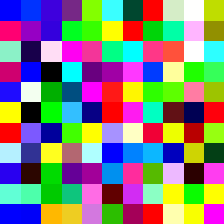

In [141]:
import os
make_filter_weight_image(testweights, 'testfilter.png', dim=11)
Image('testfilter.png')

uint8


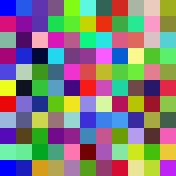

In [76]:
from PIL import Image as PILImage
inttw = twstack.astype('uint8')
print(inttw.dtype)

im = PILImage.fromarray(inttw)
im = im.resize((11*16,11*16))
im.save('testimage.png')
Image('testimage.png')

conv1, filter  94


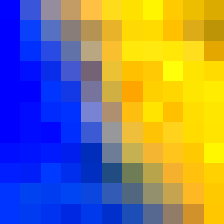

In [26]:
#make_filter_weight_image(testweights, 'testimage2.png', dim=11)
from IPython.display import clear_output, display
import time

print(conv1_params.value[0].shape)
for i in range(0,95):
    make_filter_weight_image(conv1_params.value[i], 'testimage2.png', dim=11)
    clear_output()
    print ('conv1, filter ', i)
    display(Image('testimage2.png'))
    time.sleep(1)
#Image('testimage2.png')

In [ ]:
ddddfffdfdff
fdf
df
df
dfd
fdfd
fdfd
f
df
df
df